## Importing all necessary/required libraries

In [55]:
# Python Collection
from collections import Counter

# FOR Loop Verbose
from tqdm import tqdm

# System
import os

# String
import string

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

# Date and Time
import datetime

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Numerical Data
import numpy as n

In [56]:
%matplotlib inline

In [57]:
df = pd.read_csv('merged_comments.csv')

In [58]:
total_rows = df.shape[0]
print("Total number of comments scraped from maldives subreddit:", total_rows)

Total number of comments scraped from maldives subreddit: 1286


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1286 non-null   object 
 1   Text                     1286 non-null   object 
 2   Upvotes                  1286 non-null   int64  
 3   Depth                    1286 non-null   int64  
 4   Created Timestamp(UTC)   1286 non-null   object 
 5   Replies                  1286 non-null   int64  
 6   Author                   1205 non-null   object 
 7   Post ID                  1286 non-null   object 
 8   Parrant Comment ID       1286 non-null   object 
 9   Text Length              1286 non-null   int64  
 10  Edited                   1286 non-null   object 
 11  Is Submitter             1286 non-null   bool   
 12  Subreddit Name           1286 non-null   object 
 13  seethal positive         1283 non-null   float64
 14  seethal nagative        

### Observations:

    1. Seethal/sentiment_analysis_generic_dataset model was unable to label 1286-1283 = 3 comments.
    2. cardiffnlp/twitter-roberta-base-sentiment-latest model was unable to label 1286-1274 = 12 comments.
    3. finiteautomata/bertweet-base-sentiment-analysis model was unable to label 1286-1244 = 42 comments.
    
    This may be due to the reason that those particular comments may be incompatible as an input to the respective models.
    
    Hence, we'll fill all these missing values with value -1 signifying "no label".



In [60]:
unique_id_count = df['ID'].nunique()
print("Unique count of IDs:", unique_id_count)

unique_postID_count = df['Post ID'].nunique()
print("Unique count of Post IDs:", unique_postID_count)

unique_Parrant_Comment_ID_count = df['Parrant Comment ID'].nunique()
print("Unique count of Parrant Comment IDs:", unique_Parrant_Comment_ID_count)

Unique count of IDs: 1286
Unique count of Post IDs: 125
Unique count of Parrant Comment IDs: 733


   # => Since all the comment ID's are unique, the ID column can be removed since it won't provide any insight.

In [61]:
#Removing ID column

df = df.drop(columns=['ID'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Text                     1286 non-null   object 
 1   Upvotes                  1286 non-null   int64  
 2   Depth                    1286 non-null   int64  
 3   Created Timestamp(UTC)   1286 non-null   object 
 4   Replies                  1286 non-null   int64  
 5   Author                   1205 non-null   object 
 6   Post ID                  1286 non-null   object 
 7   Parrant Comment ID       1286 non-null   object 
 8   Text Length              1286 non-null   int64  
 9   Edited                   1286 non-null   object 
 10  Is Submitter             1286 non-null   bool   
 11  Subreddit Name           1286 non-null   object 
 12  seethal positive         1283 non-null   float64
 13  seethal nagative         1283 non-null   float64
 14  seethal neutral         

# Insight:
       We can see that 1286-1205 = 81 rows have no authors, therefore, filling "UNKNOWN" for those rows,  which would basically signify that those comments are by unknown authors.

In [63]:
df['Author'].fillna('UNKNOWN', inplace=True)

### Handling rows with missing labels:

    => filling those labels as -1 indicating no label:
    Since the models were not able to label some rows/comments
    
    Following columns have some missing values:
    
     12  seethal positive         1283 non-null   float64
     13  seethal nagative         1283 non-null   float64
     14  seethal neutral          1283 non-null   float64
     15  twitter positive         1274 non-null   float64
     16  twitter nagative         1274 non-null   float64
     17  twitter neutral          1274 non-null   float64
     18  finiteautomata positive  1244 non-null   float64
     19  finiteautomata nagative  1244 non-null   float64
     20  finiteautomata neutral   1244 non-null   float64
     21  seethal label            1283 non-null   object 
     22  twitter label            1274 non-null   object 
     23  finiteautomata label     1244 non-null   object 

In [64]:
columns_to_fill = [
    'seethal positive', 'seethal nagative', 'seethal neutral',
    'twitter positive', 'twitter nagative', 'twitter neutral',
    'finiteautomata positive', 'finiteautomata nagative', 'finiteautomata neutral',
    'seethal label', 'twitter label', 'finiteautomata label'
]

df[columns_to_fill] = df[columns_to_fill].fillna(-1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Text                     1286 non-null   object 
 1   Upvotes                  1286 non-null   int64  
 2   Depth                    1286 non-null   int64  
 3   Created Timestamp(UTC)   1286 non-null   object 
 4   Replies                  1286 non-null   int64  
 5   Author                   1286 non-null   object 
 6   Post ID                  1286 non-null   object 
 7   Parrant Comment ID       1286 non-null   object 
 8   Text Length              1286 non-null   int64  
 9   Edited                   1286 non-null   object 
 10  Is Submitter             1286 non-null   bool   
 11  Subreddit Name           1286 non-null   object 
 12  seethal positive         1286 non-null   float64
 13  seethal nagative         1286 non-null   float64
 14  seethal neutral         

In [66]:
df.isna().sum()

Text                       0
Upvotes                    0
Depth                      0
Created Timestamp(UTC)     0
Replies                    0
Author                     0
Post ID                    0
Parrant Comment ID         0
Text Length                0
Edited                     0
Is Submitter               0
Subreddit Name             0
seethal positive           0
seethal nagative           0
seethal neutral            0
twitter positive           0
twitter nagative           0
twitter neutral            0
finiteautomata positive    0
finiteautomata nagative    0
finiteautomata neutral     0
seethal label              0
twitter label              0
finiteautomata label       0
final label                0
dtype: int64

# Inference:

        Now we can see that there are no missing values, all the missing data has been appropriately taken care of.

## Handling Created Timestamp(UTC) column (which contains date and time of the comment)

    Currently, in the raw dataset, the column contains values of the format =>  2023-03-10 11:16:55 UTC.
    We would separate the year, month, and date, along with the hour, minute and second.
    
    I think making a separate column for second wouldn't add any more meaning to the analysis, hence won't be adding
    the column for second. Also, adding column for the minute as well would be trivial analysis

In [67]:
import datetime

def utc_to_datetime(df):
    df['Created Timestamp(UTC)'] = pd.to_datetime(df['Created Timestamp(UTC)'])  # Convert to datetime format
    df['year'] = df['Created Timestamp(UTC)'].dt.year
    df['month'] = df['Created Timestamp(UTC)'].dt.month
    df['day'] = df['Created Timestamp(UTC)'].dt.day
    df['hour'] = df['Created Timestamp(UTC)'].dt.hour
    #df['minute'] = df['Created Timestamp(UTC)'].dt.minute
    #df['second'] = df['Created Timestamp(UTC)'].dt.second

# Call the function to add date and time components to the DataFrame
utc_to_datetime(df)
df.drop('Created Timestamp(UTC)', axis=1, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Text                     1286 non-null   object 
 1   Upvotes                  1286 non-null   int64  
 2   Depth                    1286 non-null   int64  
 3   Replies                  1286 non-null   int64  
 4   Author                   1286 non-null   object 
 5   Post ID                  1286 non-null   object 
 6   Parrant Comment ID       1286 non-null   object 
 7   Text Length              1286 non-null   int64  
 8   Edited                   1286 non-null   object 
 9   Is Submitter             1286 non-null   bool   
 10  Subreddit Name           1286 non-null   object 
 11  seethal positive         1286 non-null   float64
 12  seethal nagative         1286 non-null   float64
 13  seethal neutral          1286 non-null   float64
 14  twitter positive        

## Text Cleaning

In [69]:
import string
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\karee\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import wordnet

def clean_text(df):
    # Convert "Text" column to lowercase
    df['text_cleaned'] = df['Text'].str.lower()

    # Remove punctuation
    pattern_punctuation = r'[' + string.punctuation + '’]'
    df['text_cleaned'] = df['text_cleaned'].str.replace(pattern_punctuation, '')

    # Define a function to convert POS tags to WordNet tags
    def get_wordnet_tag(tag):
        return wordnet.NOUN if tag.startswith('N') else wordnet.VERB if tag.startswith('V') else \
               wordnet.ADJ if tag.startswith('J') else wordnet.ADV if tag.startswith('R') else wordnet.NOUN

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Apply lemmatization and remove stopwords
    stop_words = set(stopwords.words('english'))
    df['text_cleaned'] = df['text_cleaned'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word, get_wordnet_tag(tag)) for word, tag in pos_tag(word_tokenize(text)) if word not in stop_words]))

# Call the function to clean the "Text" column in the DataFrame
clean_text(df)

C:\Users\karee\AppData\Local\Temp\ipykernel_19156\2432716024.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_cleaned'] = df['text_cleaned'].str.replace(pattern_punctuation, '')


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Text                     1286 non-null   object 
 1   Upvotes                  1286 non-null   int64  
 2   Depth                    1286 non-null   int64  
 3   Replies                  1286 non-null   int64  
 4   Author                   1286 non-null   object 
 5   Post ID                  1286 non-null   object 
 6   Parrant Comment ID       1286 non-null   object 
 7   Text Length              1286 non-null   int64  
 8   Edited                   1286 non-null   object 
 9   Is Submitter             1286 non-null   bool   
 10  Subreddit Name           1286 non-null   object 
 11  seethal positive         1286 non-null   float64
 12  seethal nagative         1286 non-null   float64
 13  seethal neutral          1286 non-null   float64
 14  twitter positive        

# Here text_cleaned is the column which contains comments after text-cleaning

In [73]:
print(df['Text'])

0       Thank you so much for taking so much time and ...
1       We do have occasional Maldivian posts here. Ju...
2                                  Nop, im from\nMaldives
3                                         no im maldivian
4       Need to create a community with a different na...
                              ...                        
1281    Thanks for the reply. \n\nI'm not worried abou...
1282                                           Thank you.
1283    So sorry that you and your wife had a bad expe...
1284    Komandoo is sooooo under rated. I try to tell ...
1285    Maafushi is the most crowded and overrated loc...
Name: Text, Length: 1286, dtype: object


In [74]:
print(df['text_cleaned'])

0       thank much take much time effort reply level d...
1       occasional maldivian post people try help othe...
2                                         nop im maldives
3                                            im maldivian
4       need create community different name like rdhi...
                              ...                        
1281    thanks reply im worry arabisation worry lack s...
1282                                                thank
1283    sorry wife bad experience hope comfort u assho...
1284    komandoo sooooo rat try tell people always go ...
1285    maafushi crowded overrated local island awesom...
Name: text_cleaned, Length: 1286, dtype: object


# Text vs text_cleaned

    Above, it can be clearly seen that text_cleaned has been cleaned, by removing punctuations, lower casing, and reducing words to their base forms

# EDA

    Exploratory Data Analysis (EDA) involves various types of analyses and visualizations to better understand the dataset.

##  Correlation Matrix:
    Generate a correlation matrix to understand the relationships between numerical variables.
    
    A correlation matrix is a visual representation of the relationships between numerical variables in a dataset. It provides  insights into how different variables are related to each other in terms of their linear association. The values in the correlation matrix range from -1 to 1, indicating the strength and direction of the relationship between pairs of variables.

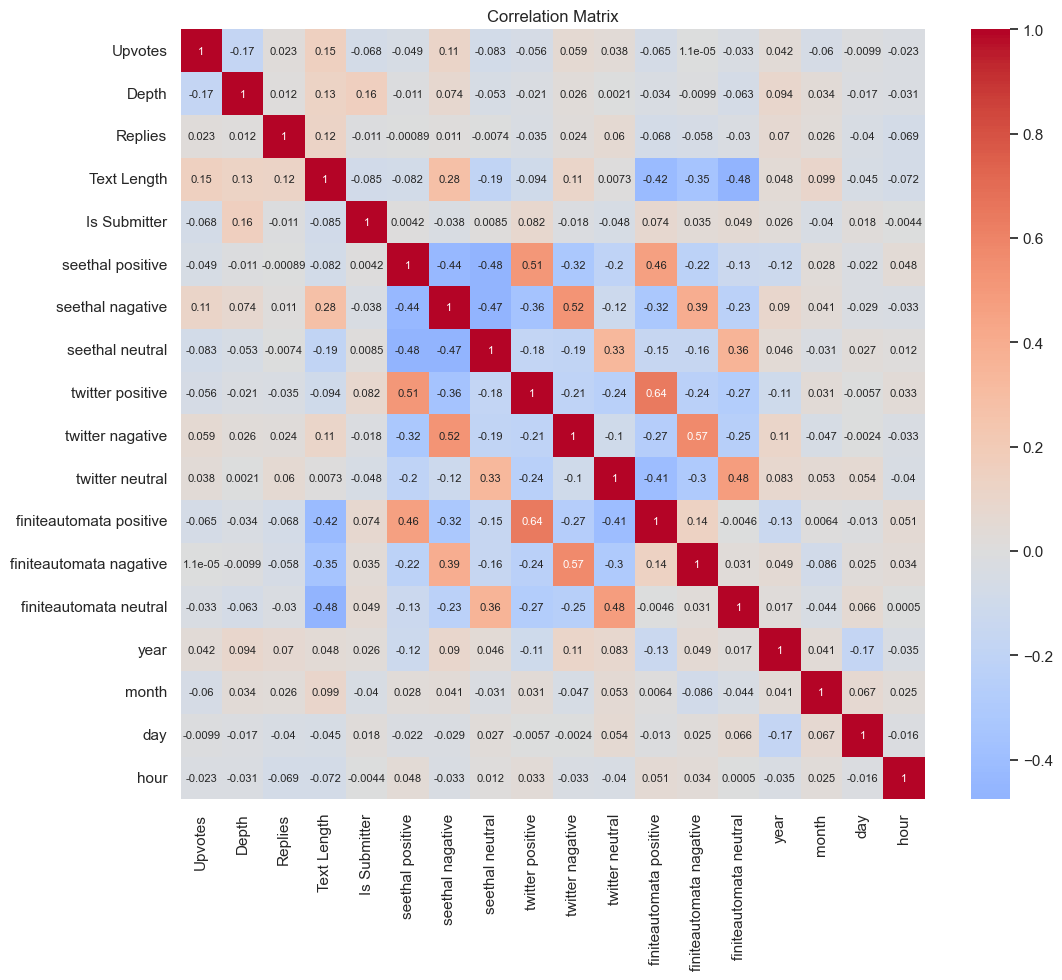

In [75]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with adjusted font size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Inferences:

    1. Correlation Coefficient Values:
    -----------------------------------

    1.1 Positive Correlation (0 to 1): A positive correlation indicates that as one variable increases, the other tends to increase as well. The closer the value is to 1, the stronger the positive correlation.
    
    ✒️For example: 💡1. Upvotes is positively (0.15) co-related with Text length => which implies that large comments are more likely to get upvotes.
    💡2. Upvotes is positively (0.042[though very small]) co-related with year => which implies that comments have recieved more upvotes in the recent years as compared to past years.
    💡3. Replies have positive correlation with month and year => implying no of replies increases as month and year passes.
    
    1.2 Negative Correlation (-1 to 0): A negative correlation indicates that as one variable increases, the other tends to decrease. The closer the value is to -1, the stronger the negative correlation.
    
    
    For example: 💡1. Upvotes is negatively (-0.17) co-related with depth => as depth increases, people are less likely to upvote those comments, which infact makes sense. Since depth denotes how deep a comment is (like the reply of a comment, then it's reply and so on [Assuming original comment has 0 depth]).
       etc.
    
    1.3 No Correlation (0): A correlation coefficient of 0 indicates no linear relationship between the variables.
    
    2. Color Scale:
    ---------------

    The color scale in the heatmap represents the strength of the correlation. Darker colors indicate stronger correlations, while lighter colors indicate weaker or no correlations.
    
    3. Annotations:
    ----------------

    The numbers in each cell of the heatmap represent the actual correlation coefficient values.
    
    4. Diagonal Line:
    -----------------

        The diagonal line of the heatmap is always filled with 1. This is because a variable is perfectly correlated with itself (correlation of 1).
        
    5. Interpreting the Values:
    ----------------------------
    The closer a correlation coefficient is to -1 or 1, the stronger the correlation. For example, a correlation coefficient of -0.8 or 0.8 indicates a strong negative or positive correlation, respectively.
    A correlation coefficient close to 0 indicates a weak or no linear relationship between the variables.
    
    
    Note: It's important to note that correlation does not imply causation. Just because two variables are correlated does not mean that changes in one variable cause changes in the other. Other factors or hidden variables could be influencing the observed relationship.

##  Distribution Plots:

    Visualizing the distribution of numerical variables using histograms.

## Is Submitter Column : 

    denotes whether the comment has been done by the person herself/himself who has written the post
    

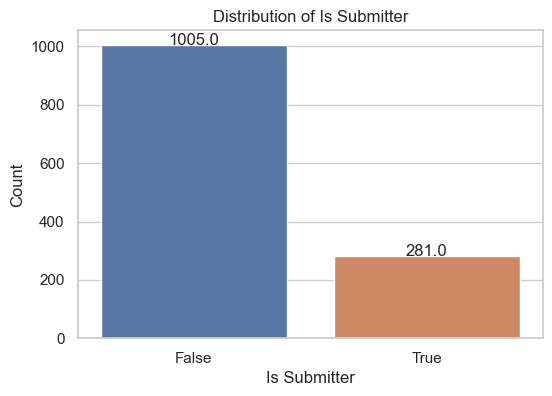

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the distribution of "Is Submitter"
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Is Submitter')
plt.title('Distribution of Is Submitter')
plt.xlabel('Is Submitter')
plt.ylabel('Count')

# Display the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

# Inference: 
        
    281/1286 *100 = 21% comments are made by the users who did the post
    

# Comparison of Is Submitter column with Other Attributes:

    Analyzing how the "Is Submitter" attribute relates to other attributes. For example, we can compare the average upvotes received by submitters and non-submitters.

In [78]:
average_upvotes_by_submitter = df.groupby('Is Submitter')['Upvotes'].mean()
print(average_upvotes_by_submitter)

Is Submitter
False    2.219900
True     1.893238
Name: Upvotes, dtype: float64


# Conclusion: 
    average no of upvotes recieved on the comments made by post submitter are less than those of non-submitters

In [87]:
unique_Upvotes_values = df['Upvotes'].unique()
print(unique_Upvotes_values)

[ 2 20  7  6  5  4  3 -1  1  0  8  9 -5 12 -7 11 10 -4 -8 -9 -2 15 -3]


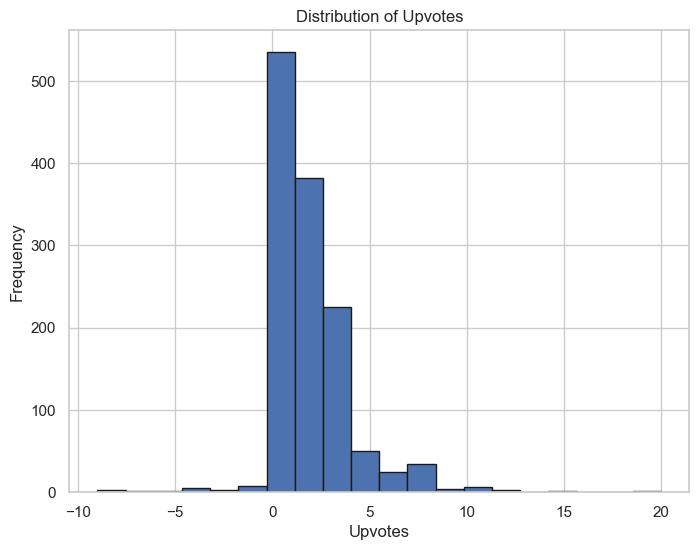

In [88]:
column_name = 'Upvotes'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

### Upvotes : 
     ✍️From the graph we can see that most posts have recieved has 0-1 upvotes. It is likely to happen that since it is maldives subreddit, there is less interaction/engagement on the comments there. 
     While downvotes are rare!

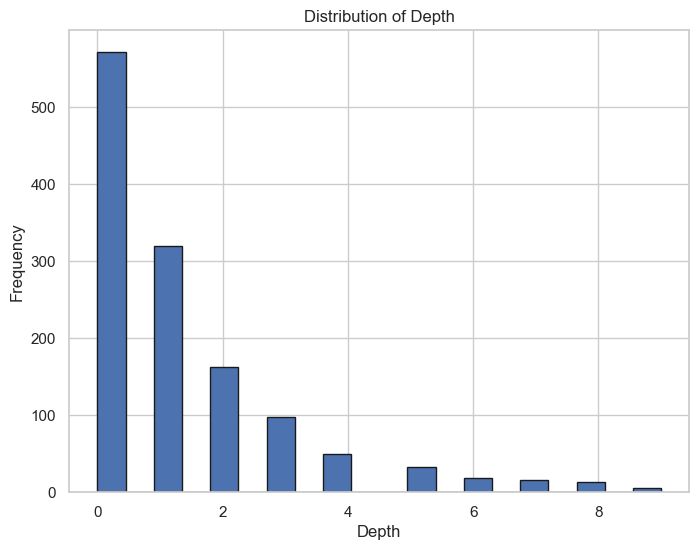

In [89]:
column_name = 'Depth'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

## Depth : 
    Depth denotes the relative depth of a comment with respect to it's parent comment. For example if a comment is a reply to a reply of a comment, then it's depth would be taken as 2, assuming depth of parent comment is taken as zero
    
    From the graph it is seen that people are not much interested in replying to comments, the reason I think is possibly posts on maldives subreddit would contain pictures of beaches, waters, tourist places, etc. So, people might comment like "beautiful" etc. Then it make sense that these kind of comments may not recieve any reply. 
    Also, maldives is a very small country/island.

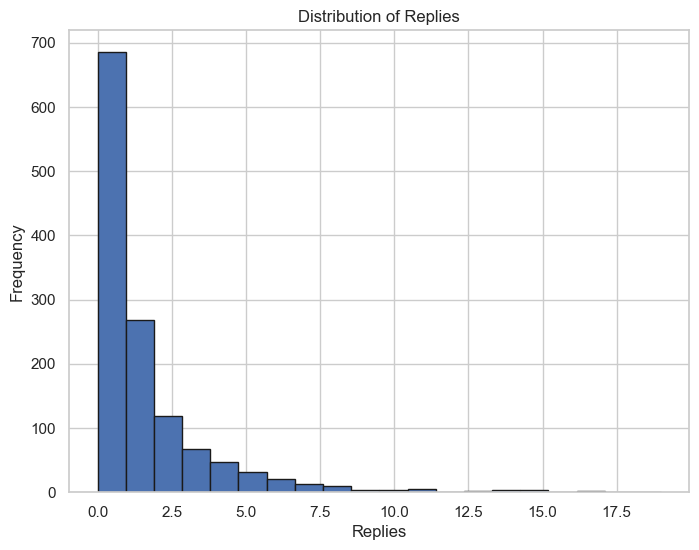

In [90]:
column_name = 'Replies'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

## Replies column:

    Replies denotes no of replies to a comment.
    
    Again, similar to Depth, most comments have gottten 0-1 replies, as talked in previous analyisis of "Depth".

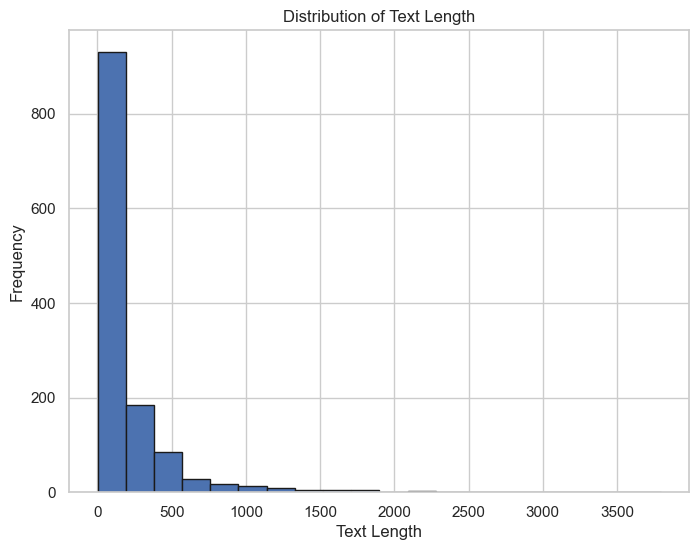

In [91]:
column_name = 'Text Length'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

In [92]:
unique_TextLength_values = sorted(df['Text Length'].unique())
print(unique_TextLength_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171, 172, 173, 175, 176, 177, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 212, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 231, 232, 233, 235, 236, 237, 238, 240, 242, 24

## Text Length: 
     denotes the lenght of the comment (words in a comment).
     
     It can be seen that maximum lenght of a comment in the scraped comments is 3797, and from the graph it is clear that no of such large comments is very less.
     
     Most comments have length ranging between 0-100 => the maldives subreddit contains brief comments!
    

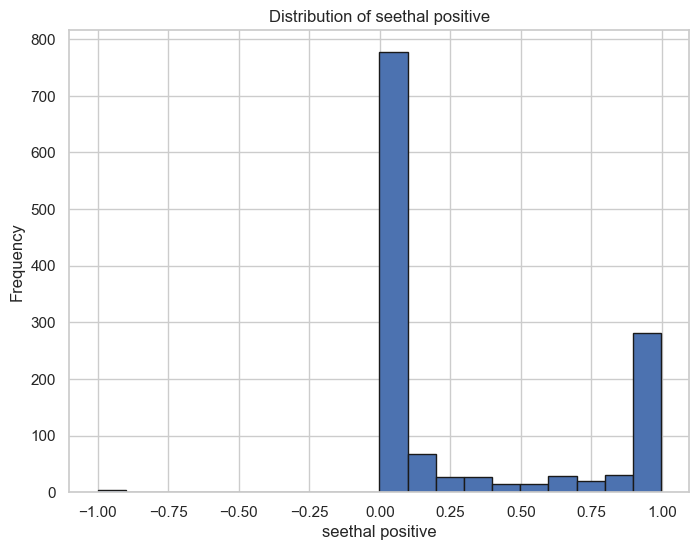

In [93]:
column_name = 'seethal positive'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

## seethal positive column:

    denotes the positive label fraction as given by Seethal/sentiment_analysis_generic_dataset model.
    
    Mostly the percentage lies between 0 to 20 and some lies between 90 to 100 % 
    
    

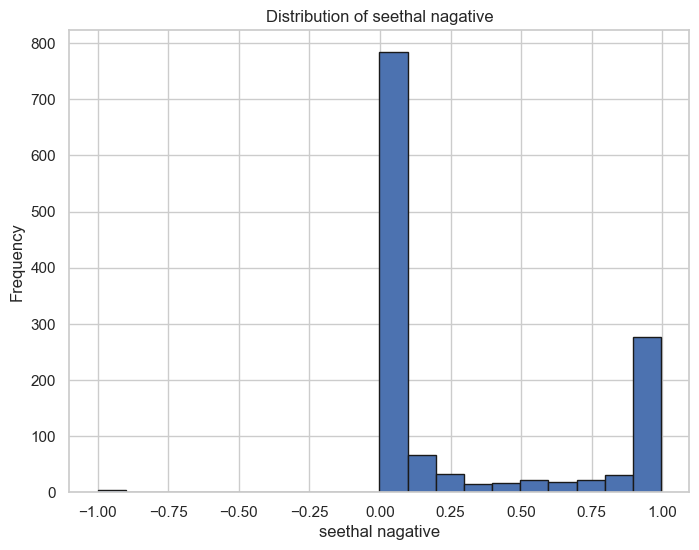

In [94]:
column_name = 'seethal nagative'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

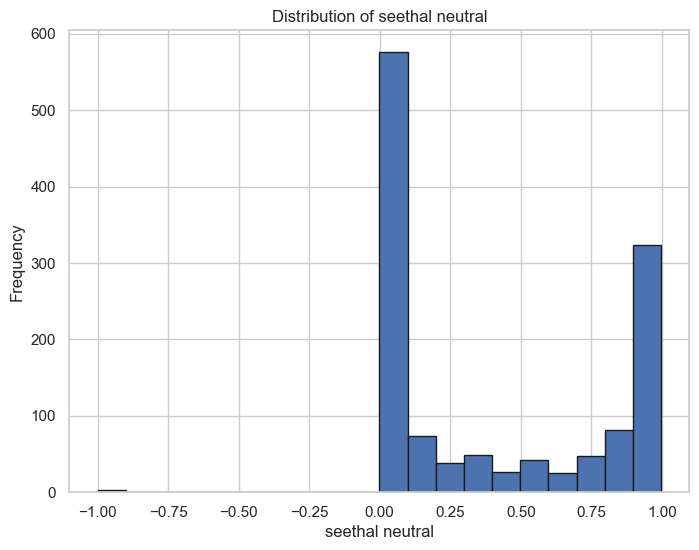

In [95]:
column_name = 'seethal neutral'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

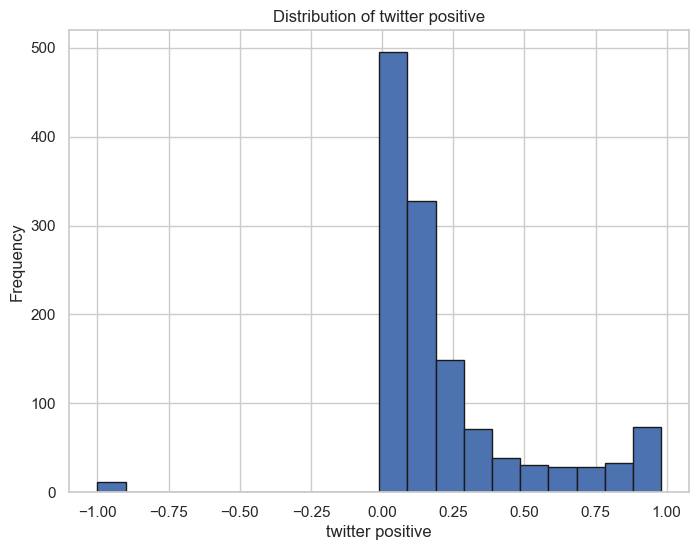

In [96]:
column_name = 'twitter positive'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

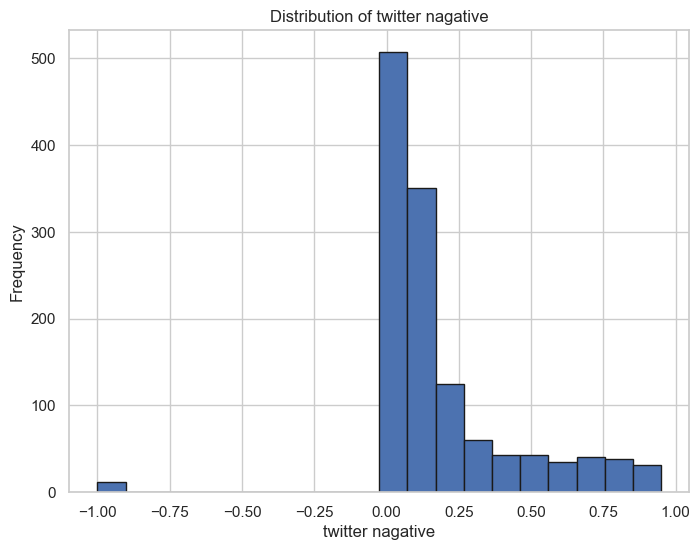

In [97]:
column_name = 'twitter nagative'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

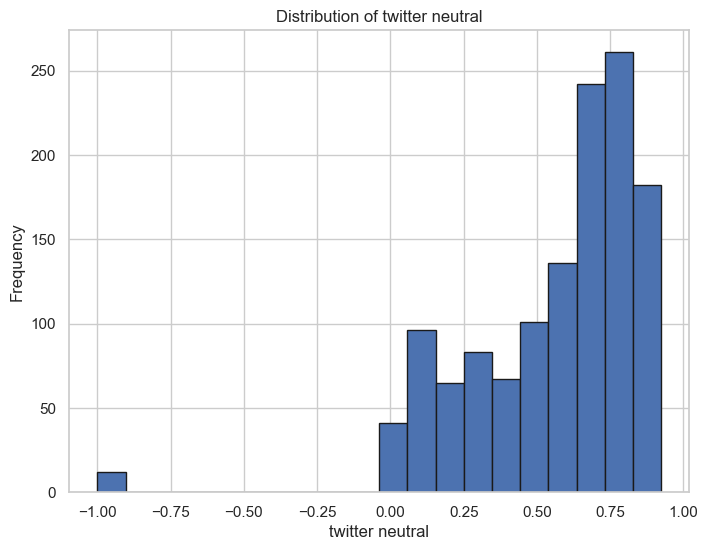

In [98]:
column_name = 'twitter neutral'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

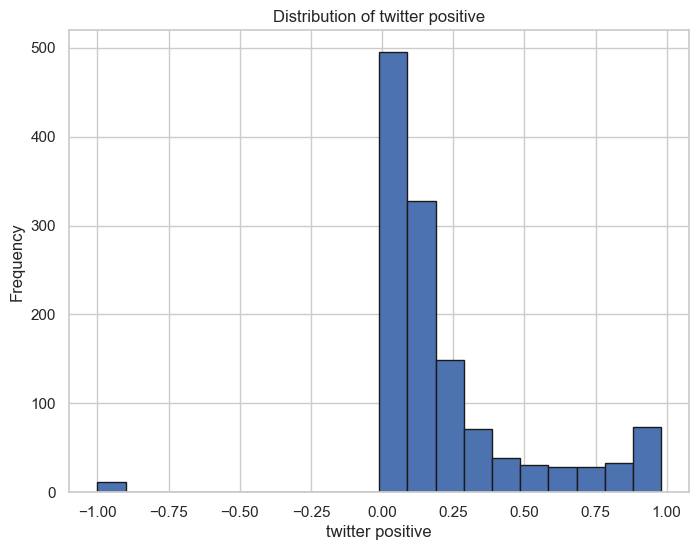

In [100]:
column_name = 'twitter positive'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

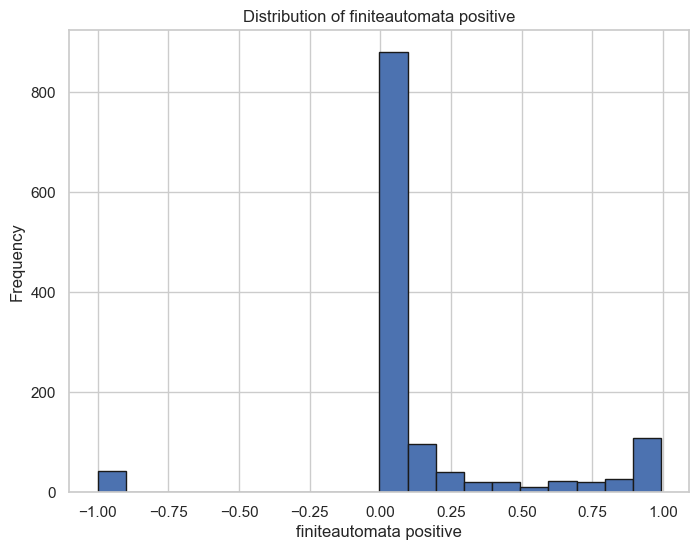

In [101]:
column_name = 'finiteautomata positive'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

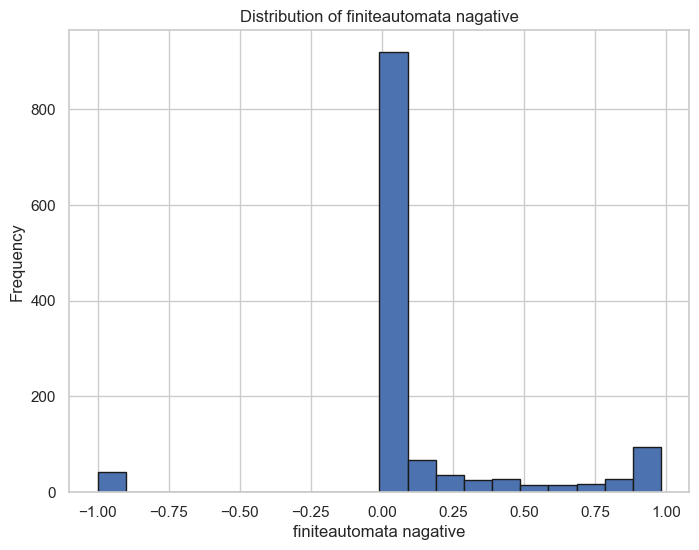

In [102]:
column_name = 'finiteautomata nagative'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

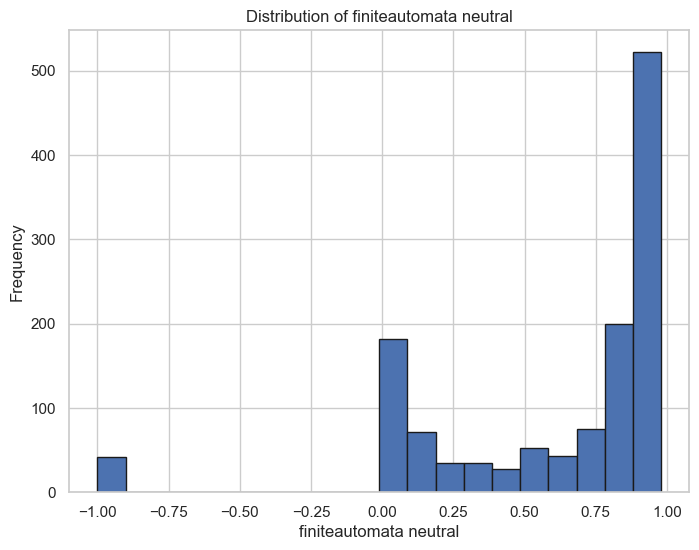

In [103]:
column_name = 'finiteautomata neutral'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

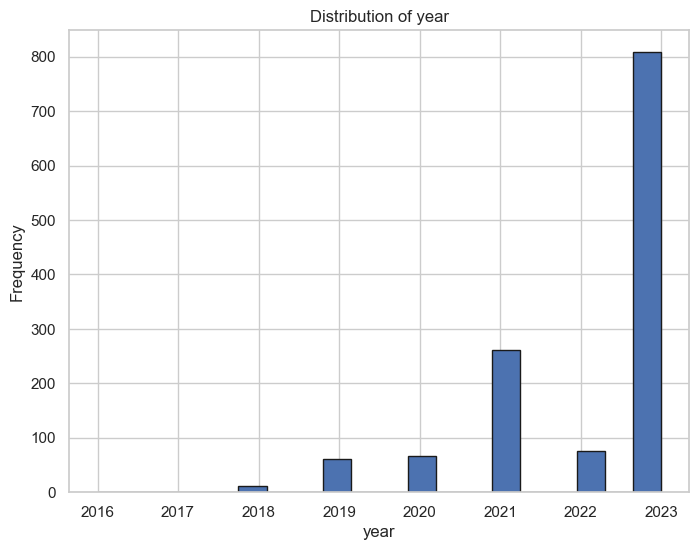

In [104]:
column_name = 'year'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

## year column:

    from the corpus of scraped comments, major amount of comments were made in 2023 year.

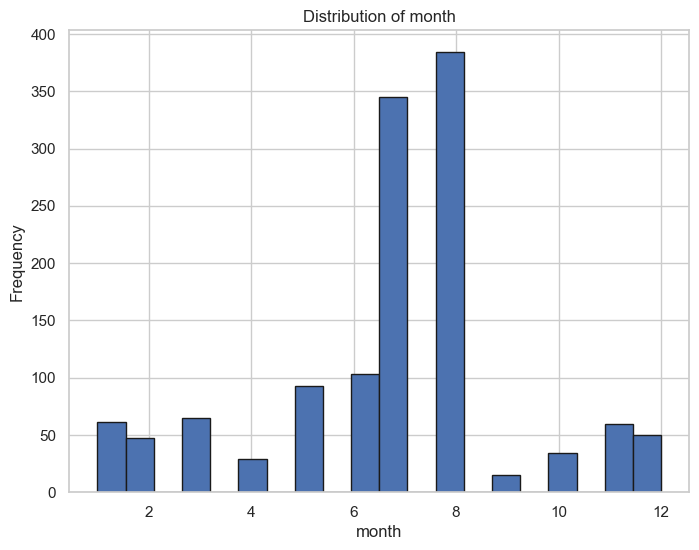

In [106]:
column_name = 'month'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

## month column

    most comments are made between July and August. 

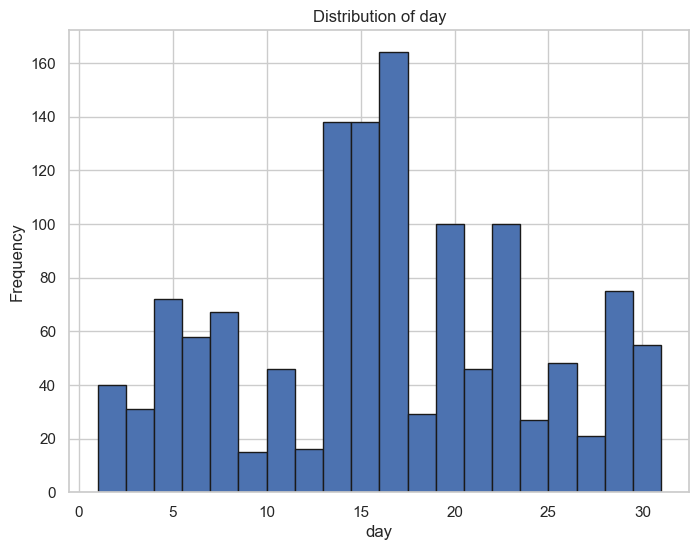

In [105]:
column_name = 'day'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# day column:

    most comments are made around middle of the month

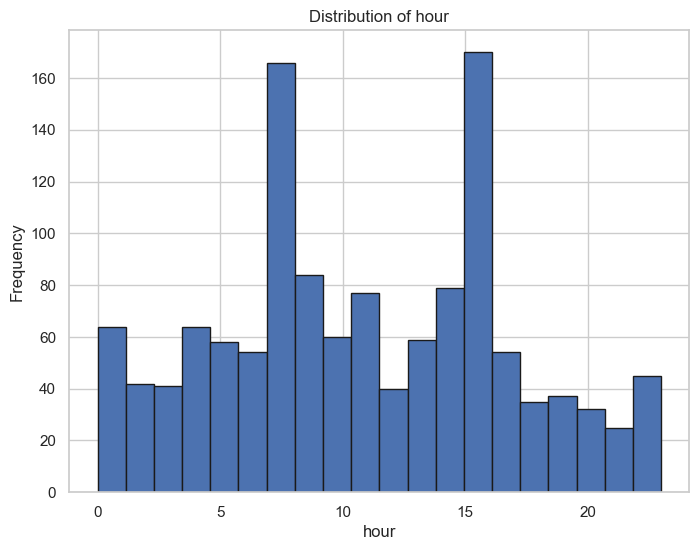

In [107]:
column_name = 'hour'
plt.figure(figsize=(8, 6))
plt.hist(df[column_name], bins=20, edgecolor='k')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

# hour column:

    The people on maldives subreddit are mostly active around 7-8 am , 3-4 pm 

--------------------------x--------------------------

## Author column

    Getting count of top 20 authors of the comments.
    
    Author column contains name of the user who has made the comment!

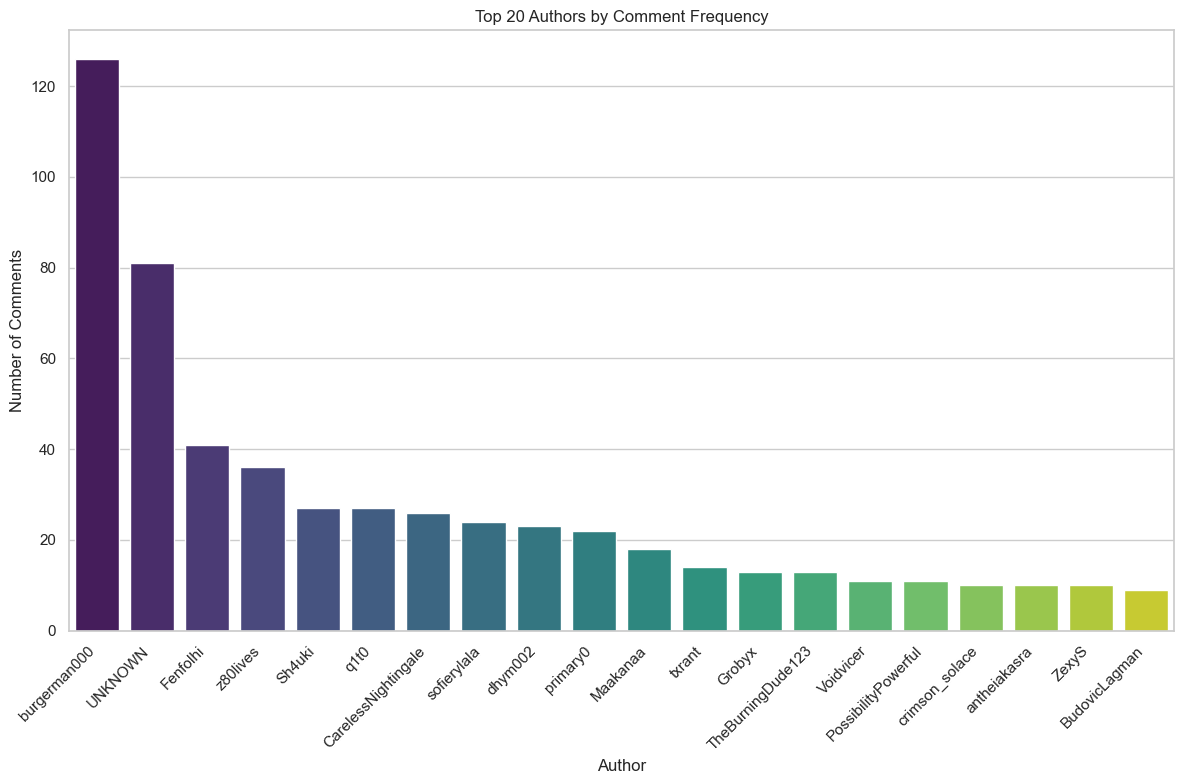

In [108]:
# Get the top 20 authors by comment frequency
top_authors = df['Author'].value_counts().head(20)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the distribution of comments by top authors
author_plot = sns.barplot(x=top_authors.index, y=top_authors.values, palette='viridis')
author_plot.set_xticklabels(author_plot.get_xticklabels(), rotation=45, ha='right')
plt.title('Top 20 Authors by Comment Frequency')
plt.xlabel('Author')
plt.ylabel('Number of Comments')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.info()

## Visualizing the comparison of labels assigned by different models for the same comment

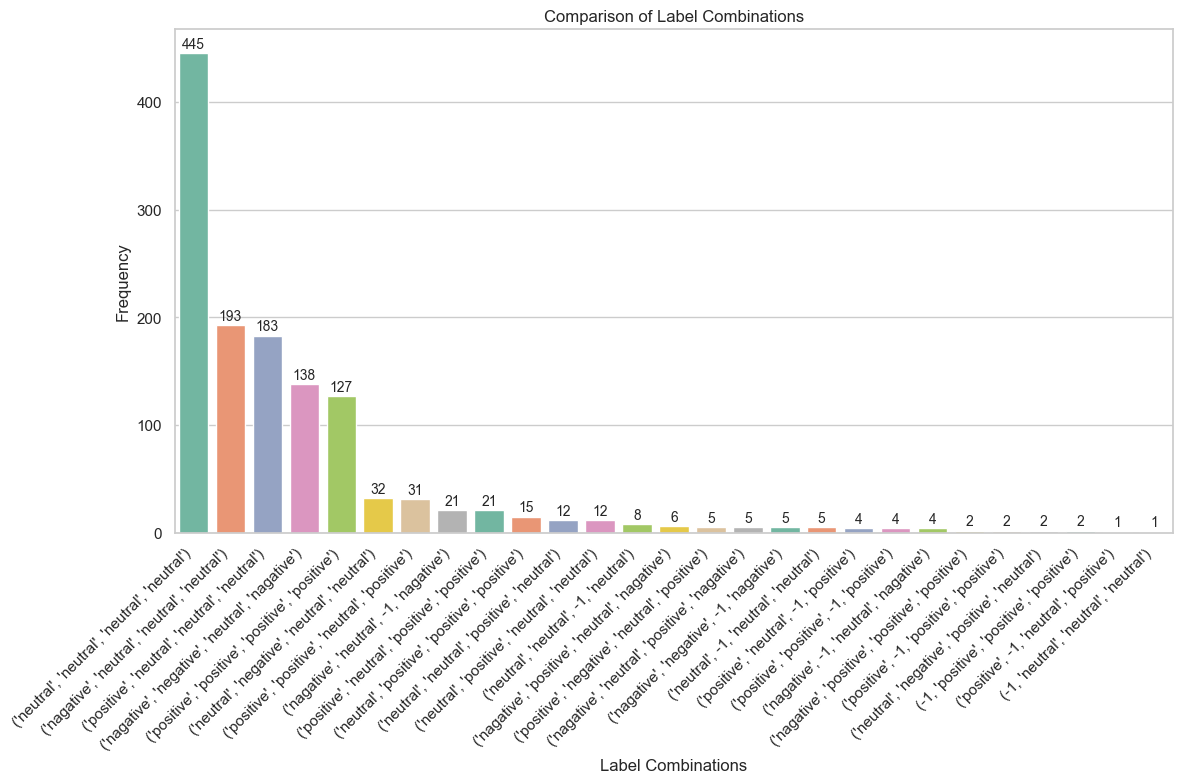

In [109]:
# Select the columns containing model labels
model_label_columns = ['seethal label', 'twitter label', 'finiteautomata label', 'final label']

# Filter the DataFrame to include only rows where all labels are available
filtered_df = df.dropna(subset=model_label_columns, how='all')

# Create a new DataFrame to store the label comparison data
comparison_data = filtered_df[model_label_columns]

# Calculate the frequency of label combinations
label_combination_counts = comparison_data.apply(lambda row: tuple(row), axis=1).value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=label_combination_counts.index, y=label_combination_counts.values, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Label Combinations')
plt.ylabel('Frequency')
plt.title('Comparison of Label Combinations')

# Annotate the bars with the exact count values
for i, count in enumerate(label_combination_counts.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Inferences:

    📊The bar plot shows the frequency of occurrences for different combinations of labels assigned by different models to the same row/comment. Each bar on the plot represents a combination of labels, and its height indicates how often that combination occurs in the dataset.
    
    We can see that neutral label dominates. All the three model labelled the comments as neutral for more than 400 comments, and hence the final label for those comments/rows is also neutral.
    
    We may calculate the synchronization percentage (or percentage of all three models giving same sentiment) = 445*100/1286 = 34% i.e. times when all three models behaved same wrt to sentimental analysis.
    
    For example: 
    Suppose there is a comment in the dataset: "I found the place to be quite average, not too good nor too bad." If all four models—Seethal, Twitter, Finite Automata, and the final model—assign the "neutral" sentiment label to this comment, it means that all these models perceive the sentiment expressed in the comment as neither distinctly positive nor distinctly negative. Instead, they collectively interpret the sentiment as being in the middle or neutral.

    This level of consistency among the models' label assignments can indicate that the comment's sentiment is not strongly polarized, and the models' predictions align in assessing its overall sentiment as neutral.
    

#  Levels of agreement among the models' label assignments

     The labels on the slices of pie chart indicate the number of models that agreed on a certain label for the same comment levels of agreement among the models' label assignments

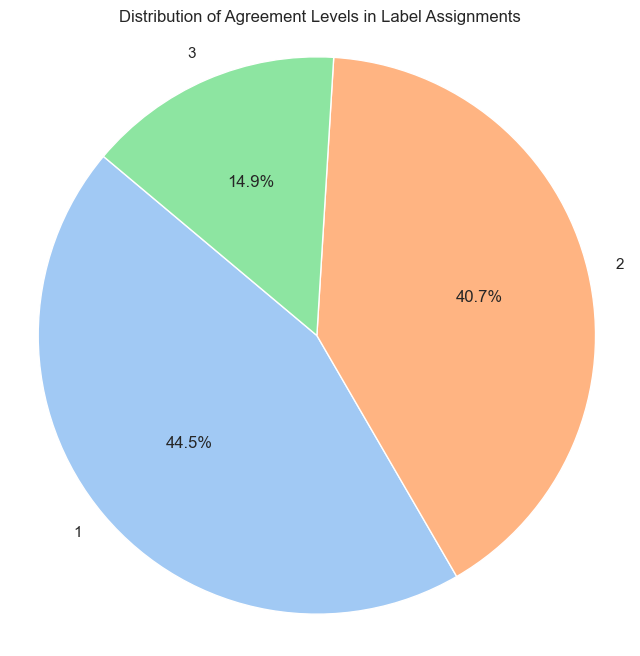

In [112]:
# Select the columns containing model labels
model_label_columns = ['seethal label', 'twitter label', 'finiteautomata label']

# Filter the DataFrame to include only rows where all labels are available
filtered_df = df.dropna(subset=model_label_columns, how='all')

# Create a new DataFrame to store the label comparison data
comparison_data = filtered_df[model_label_columns]

# Calculate the frequency of label combinations
label_combination_counts = comparison_data.apply(lambda row: tuple(row), axis=1).value_counts()

# Count the occurrences of different levels of agreement
agreement_counts = {}
for label_combination, count in label_combination_counts.items():
    agreement_level = len(set(label_combination))
    if agreement_level not in agreement_counts:
        agreement_counts[agreement_level] = count
    else:
        agreement_counts[agreement_level] += count

# Create a DataFrame for plotting
agreement_df = pd.DataFrame(agreement_counts.items(), columns=['Agreement Level', 'Frequency'])

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(agreement_df)]
plt.pie(agreement_df['Frequency'], labels=agreement_df['Agreement Level'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Agreement Levels in Label Assignments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

## Looking at Statistics:

In [113]:
df.describe(include='all')

,Text,Upvotes,Depth,Replies,Author,Post ID,Parrant Comment ID,Text Length,Edited,Is Submitter,...,finiteautomata neutral,seethal label,twitter label,finiteautomata label,final label,year,month,day,hour,text_cleaned
count,1286,1286.000000,1286.000000,1286.000000,1286,1286,1286,1286.000000,1286,1286,...,1286.000000,1286,1286,1286,1286,1286.000000,1286.000000,1286.000000,1286.000000,1286
unique,1266,NaN,NaN,NaN,414,125,733,NaN,44,2,...,NaN,4,4,3,3,NaN,NaN,NaN,NaN,1241
top,[deleted],NaN,NaN,NaN,burgerman000,15qeqe6,t3_13i8by9,NaN,FALSE,False,...,NaN,neutral,neutral,neutral,neutral,NaN,NaN,NaN,NaN,delete
freq,9,NaN,NaN,NaN,126,91,56,NaN,1243,1005,...,NaN,531,893,1056,893,NaN,NaN,NaN,NaN,9
mean,NaN,2.148523,1.306376,1.300156,NaN,NaN,NaN,186.118196,NaN,NaN,...,0.602465,NaN,NaN,NaN,NaN,2022.136858,6.820373,16.161742,10.849145,NaN
std,NaN,1.993498,1.773407,2.358879,NaN,NaN,NaN,308.354677,NaN,NaN,...,0.453200,NaN,NaN,NaN,NaN,1.275301,2.505326,7.696801,5.798345,NaN
min,NaN,-9.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,2016.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,28.250000,NaN,NaN,...,0.256178,NaN,NaN,NaN,NaN,2021.000000,6.000000,11.000000,6.000000,NaN
50%,NaN,2.000000,1.000000,0.000000,NaN,NaN,NaN,73.000000,NaN,NaN,...,0.840397,NaN,NaN,NaN,NaN,2023.000000,7.000000,16.000000,11.000000,NaN
75%,NaN,3.000000,2.000000,2.000000,NaN,NaN,NaN,215.000000,NaN,NaN,...,0.933319,NaN,NaN,NaN,NaN,2023.000000,8.000000,22.000000,15.000000,NaN


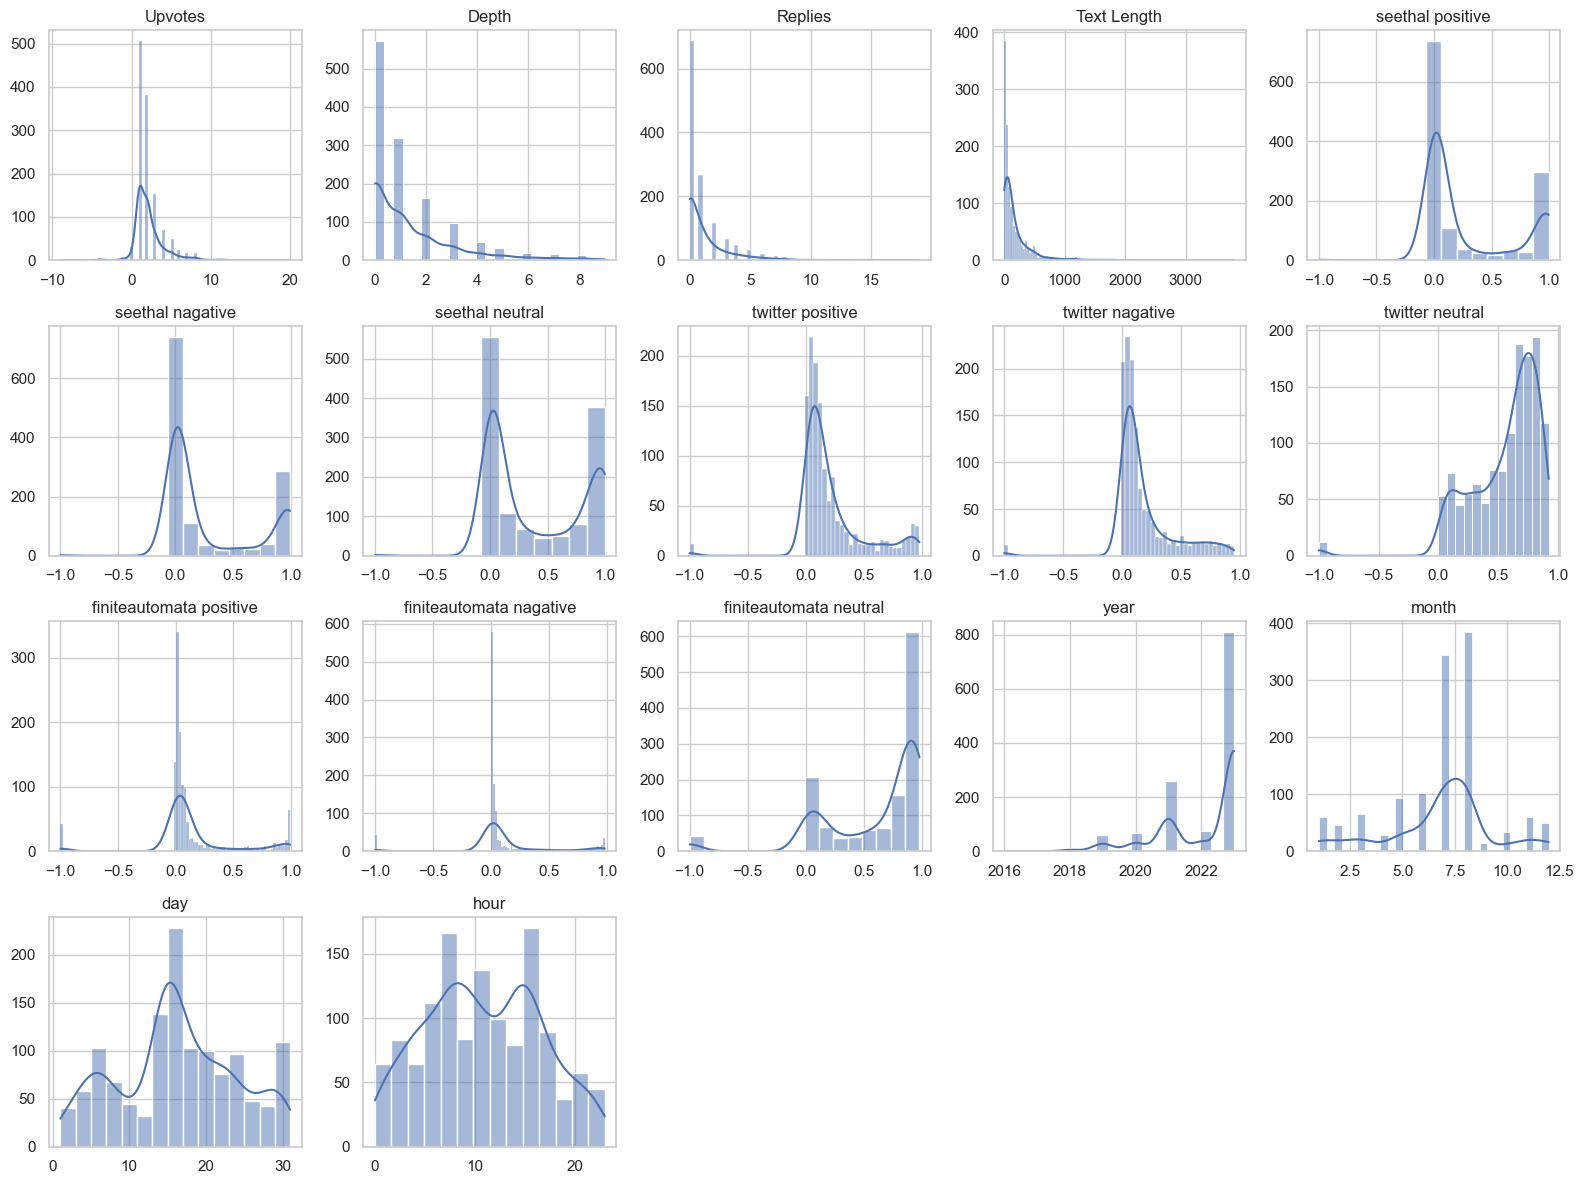

In [114]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Select numerical columns for visualization
numerical_columns = ['Upvotes', 'Depth', 'Replies', 'Text Length', 'seethal positive',
                     'seethal nagative', 'seethal neutral', 'twitter positive', 'twitter nagative',
                     'twitter neutral', 'finiteautomata positive', 'finiteautomata nagative',
                     'finiteautomata neutral', 'year', 'month', 'day', 'hour']

# Plotting the distribution of each numerical column
plt.figure(figsize=(16, 12))
for column in numerical_columns:
    plt.subplot(4, 5, numerical_columns.index(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

In [115]:
print(df.describe())

           Upvotes        Depth      Replies  Text Length  seethal positive  \
count  1286.000000  1286.000000  1286.000000  1286.000000       1286.000000   
mean      2.148523     1.306376     1.300156   186.118196          0.296557   
std       1.993498     1.773407     2.358879   308.354677          0.410989   
min      -9.000000     0.000000     0.000000     1.000000         -1.000000   
25%       1.000000     0.000000     0.000000    28.250000          0.003949   
50%       2.000000     1.000000     0.000000    73.000000          0.031745   
75%       3.000000     2.000000     2.000000   215.000000          0.751013   
max      20.000000     9.000000    19.000000  3797.000000          0.997286   

       seethal nagative  seethal neutral  twitter positive  twitter nagative  \
count       1286.000000      1286.000000       1286.000000       1286.000000   
mean           0.291844         0.402268          0.215964          0.186045   
std            0.410487         0.421274        

<Figure size 1500x1000 with 0 Axes>

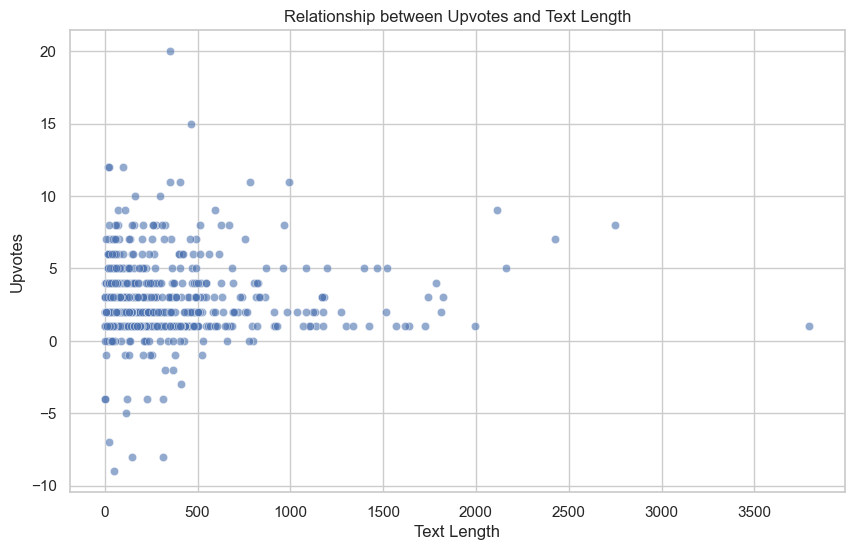

In [116]:
# Set up the figure and axes
plt.figure(figsize=(15, 10))


# Adjust layout
plt.tight_layout()


# Scatter plot for relationship between Upvotes and Text Length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Text Length', y='Upvotes', alpha=0.6)
plt.title('Relationship between Upvotes and Text Length')
plt.xlabel('Text Length')
plt.ylabel('Upvotes')
plt.show()

# 🔝Relationship between comment length and upvotes:

    from above scatter plot it is clear that shorter comments have recieved more upvotes => may be that can mean that people are too lazy to read larger comments and then upvote them :D

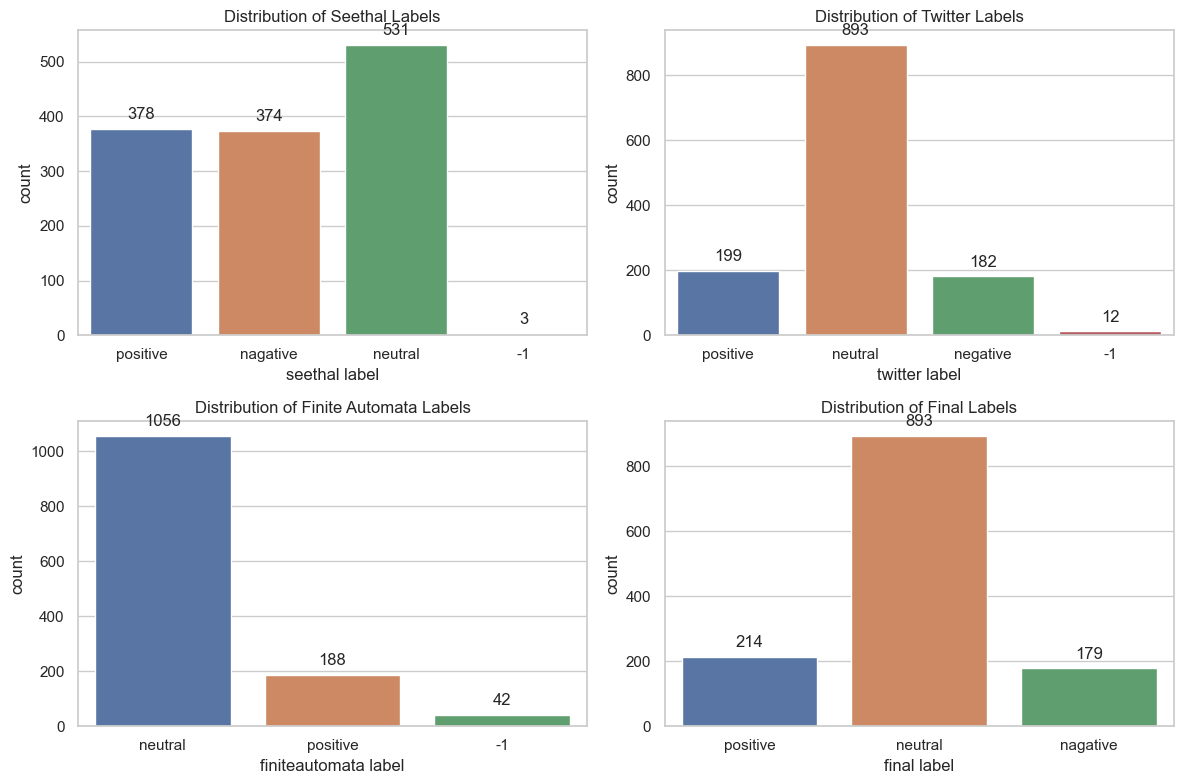

In [117]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot bar plots for label distributions
plt.subplot(2, 2, 1)
seethal_label_plot = sns.countplot(data=df, x='seethal label')
plt.title('Distribution of Seethal Labels')
for p in seethal_label_plot.patches:
    seethal_label_plot.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', 
                                xytext = (0, 10), 
                                textcoords = 'offset points')

plt.subplot(2, 2, 2)
twitter_label_plot = sns.countplot(data=df, x='twitter label')
plt.title('Distribution of Twitter Labels')
for p in twitter_label_plot.patches:
    twitter_label_plot.annotate(format(p.get_height(), '.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', 
                                xytext = (0, 10), 
                                textcoords = 'offset points')

plt.subplot(2, 2, 3)
finiteautomata_label_plot = sns.countplot(data=df, x='finiteautomata label')
plt.title('Distribution of Finite Automata Labels')
for p in finiteautomata_label_plot.patches:
    finiteautomata_label_plot.annotate(format(p.get_height(), '.0f'), 
                                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                                       ha = 'center', va = 'center', 
                                       xytext = (0, 10), 
                                       textcoords = 'offset points')

plt.subplot(2, 2, 4)
final_label_plot = sns.countplot(data=df, x='final label')
plt.title('Distribution of Final Labels')
for p in final_label_plot.patches:
    final_label_plot.annotate(format(p.get_height(), '.0f'), 
                              (p.get_x() + p.get_width() / 2., p.get_height()), 
                              ha = 'center', va = 'center', 
                              xytext = (0, 10), 
                              textcoords = 'offset points')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Temporal Analysis:

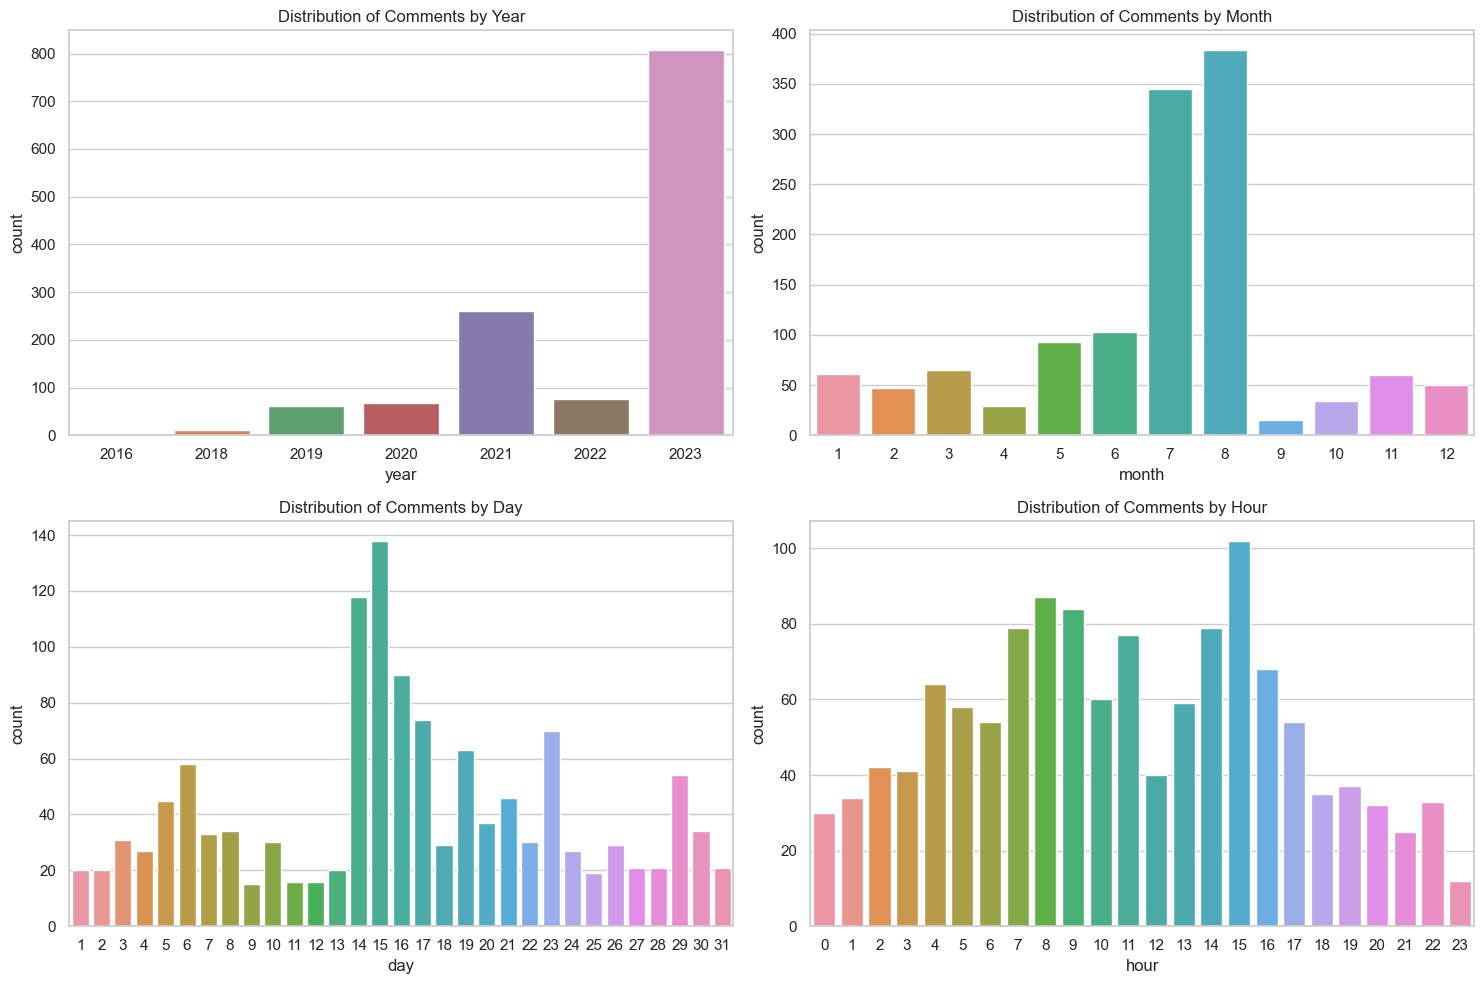

In [118]:
# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Temporal analysis for years
plt.subplot(2, 2, 1)
year_plot = sns.countplot(data=df, x='year')
plt.title('Distribution of Comments by Year')

# Temporal analysis for months
plt.subplot(2, 2, 2)
month_plot = sns.countplot(data=df, x='month')
plt.title('Distribution of Comments by Month')

# Temporal analysis for days
plt.subplot(2, 2, 3)
day_plot = sns.countplot(data=df, x='day')
plt.title('Distribution of Comments by Day')

# Temporal analysis for hours
plt.subplot(2, 2, 4)
hour_plot = sns.countplot(data=df, x='hour')
plt.title('Distribution of Comments by Hour')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Sentiment Analysis:

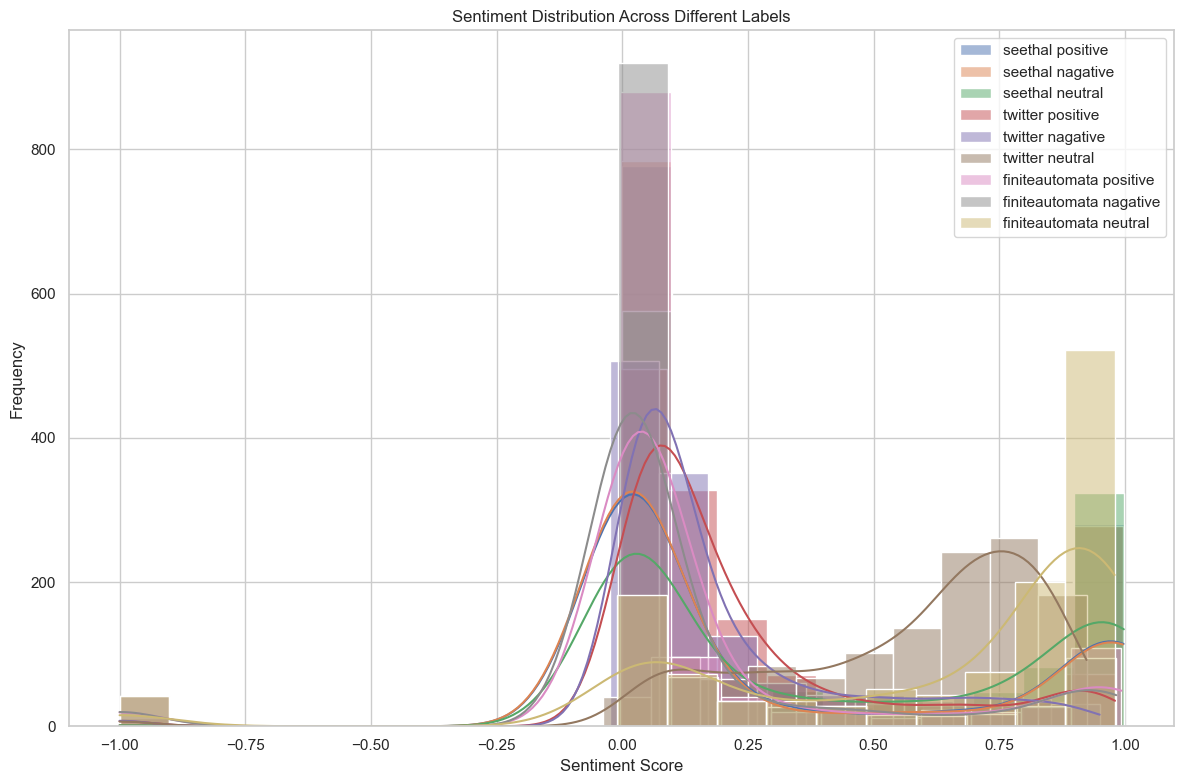

In [119]:
# Define the sentiment columns for analysis
sentiment_columns = ['seethal positive', 'seethal nagative', 'seethal neutral',
                     'twitter positive', 'twitter nagative', 'twitter neutral',
                     'finiteautomata positive', 'finiteautomata nagative', 'finiteautomata neutral']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the sentiment distribution for each label
for column in sentiment_columns:
    sentiment_plot = sns.histplot(df[column], bins=20, kde=True, label=column)
    
plt.title('Sentiment Distribution Across Different Labels')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Word Frequency Analysis:

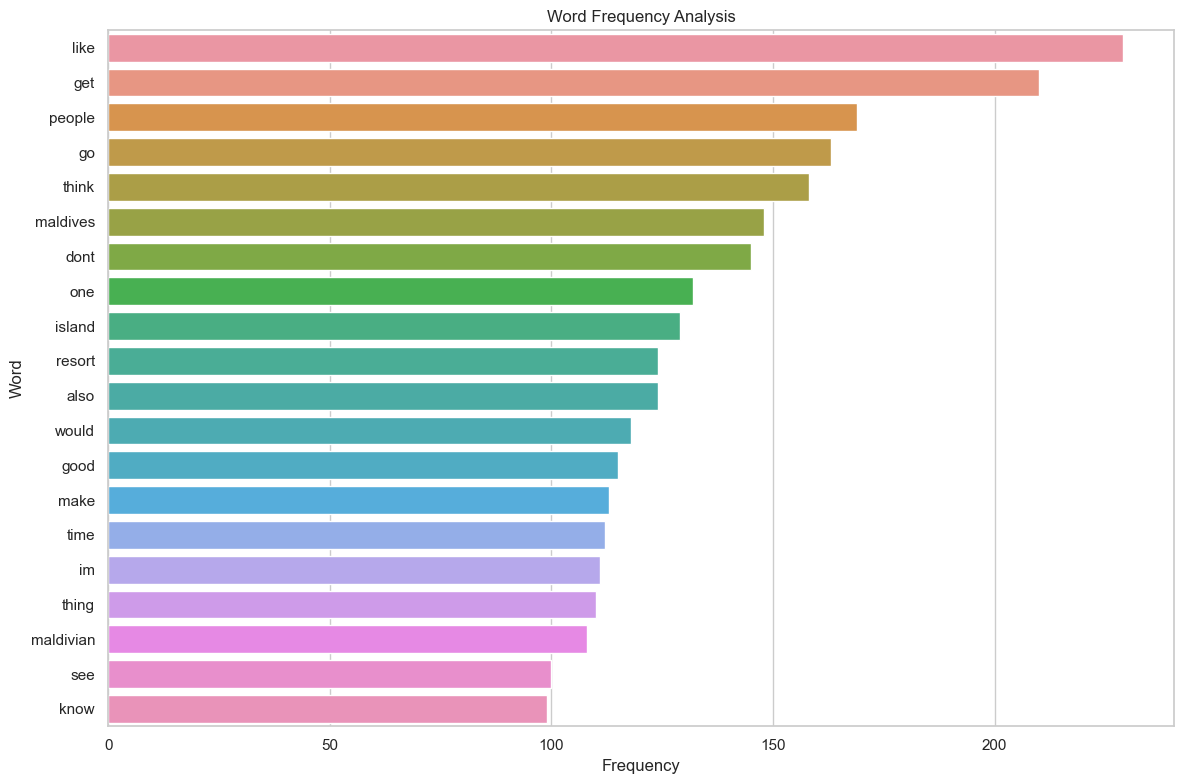

In [121]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all cleaned text into a single string
all_text = ' '.join(df['text_cleaned'])

# Tokenize the text
tokens = all_text.split()

# Calculate word frequencies
word_freq = Counter(tokens)

# Convert word frequencies to a DataFrame for plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a bar plot to show word frequencies
sns.barplot(data=word_freq_df.head(20), x='Frequency', y='Word')
plt.title('Word Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Word')

# Show the plot
plt.tight_layout()
plt.show()

## Interaction patterns:

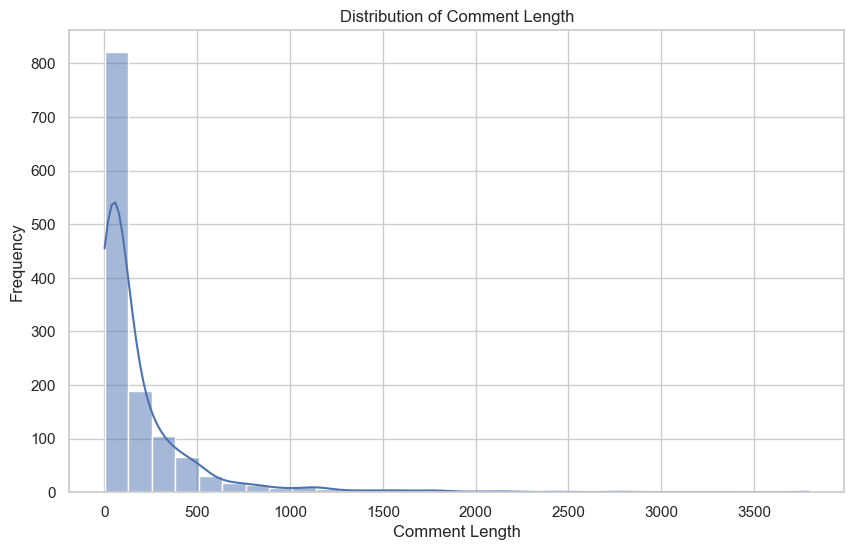

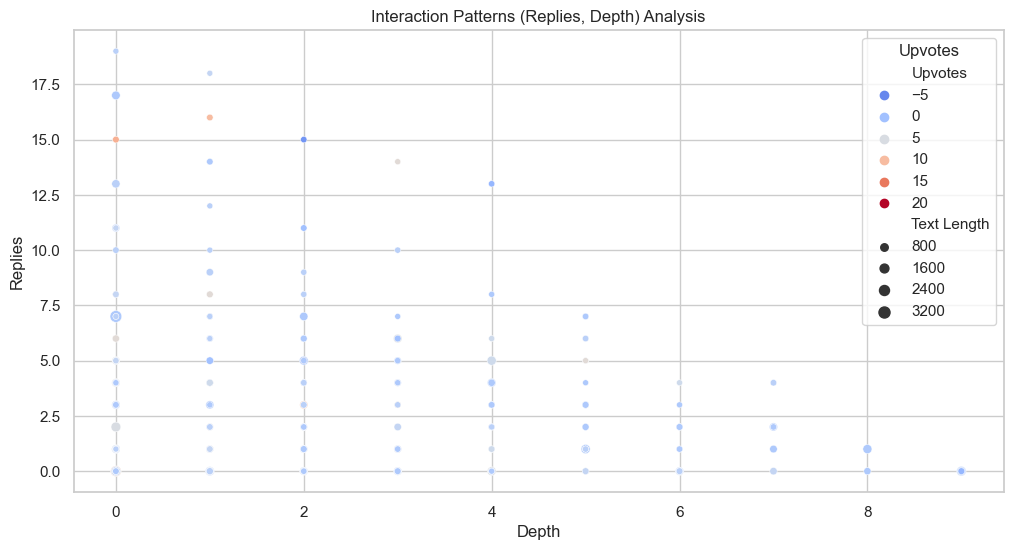

In [122]:
# Comment Length Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Text Length', bins=30, kde=True)
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

# Interaction Patterns (Replies, Depth) Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Depth', y='Replies', hue='Upvotes', palette='coolwarm', size='Text Length')
plt.title('Interaction Patterns (Replies, Depth) Analysis')
plt.xlabel('Depth')
plt.ylabel('Replies')
plt.legend(title='Upvotes')
plt.show()

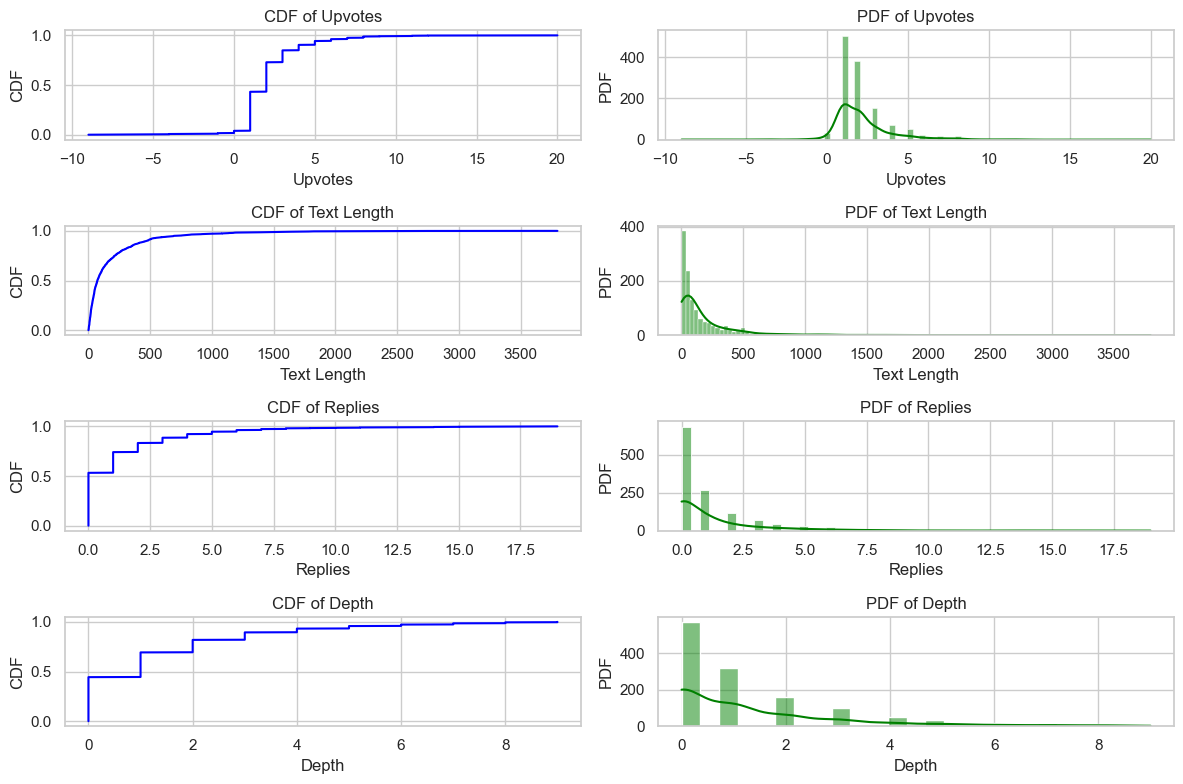

In [124]:
# Columns for analysis
columns_for_analysis = ['Upvotes', 'Text Length', 'Replies', 'Depth']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_for_analysis), ncols=2, figsize=(12, 2*len(columns_for_analysis)))
fig.tight_layout(pad=3.0)

# Iterate through columns and create plots
for idx, col in enumerate(columns_for_analysis):
    # CDF Plot
    sorted_data = np.sort(df[col])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[idx, 0].plot(sorted_data, cdf, color='blue')
    axes[idx, 0].set_title(f'CDF of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('CDF')

    # PDF Plot
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 1], color='green')
    axes[idx, 1].set_title(f'PDF of {col}')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].set_ylabel('PDF')

plt.tight_layout()
plt.show()

# Significance:

    CDF Plot: The CDF plot (blue line) shows how the data is distributed across different values. It helps us understand the percentile rank of certain values. For example, if the CDF is steep in the beginning, it indicates that a small portion of the data has very low values. If it's steeper towards the end, it indicates that a small portion of data has very high values. The CDF can be useful for understanding the spread and distribution of the data.

    PDF Plot: The PDF plot (green curve) is an estimate of the probability distribution of a continuous random variable. It helps visualize the likelihood of different values occurring in the dataset. The areas under the curve provide insights into the relative frequency of different ranges of values. Peaks in the PDF represent modes of the distribution.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Text                     1286 non-null   object 
 1   Upvotes                  1286 non-null   int64  
 2   Depth                    1286 non-null   int64  
 3   Replies                  1286 non-null   int64  
 4   Author                   1286 non-null   object 
 5   Post ID                  1286 non-null   object 
 6   Parrant Comment ID       1286 non-null   object 
 7   Text Length              1286 non-null   int64  
 8   Edited                   1286 non-null   object 
 9   Is Submitter             1286 non-null   bool   
 10  Subreddit Name           1286 non-null   object 
 11  seethal positive         1286 non-null   float64
 12  seethal nagative         1286 non-null   float64
 13  seethal neutral          1286 non-null   float64
 14  twitter positive        

# Getting a majority label for entire corpus as per each model

In [127]:
# Select the label columns
label_columns = ['seethal label', 'twitter label', 'finiteautomata label', 'final label']

# Calculate the mode (majority label) for each label column
majority_labels = df[label_columns].mode().iloc[0]

print("Majority Labels:")
print(majority_labels)

Majority Labels:
seethal label           neutral
twitter label           neutral
finiteautomata label    neutral
final label             neutral
Name: 0, dtype: object


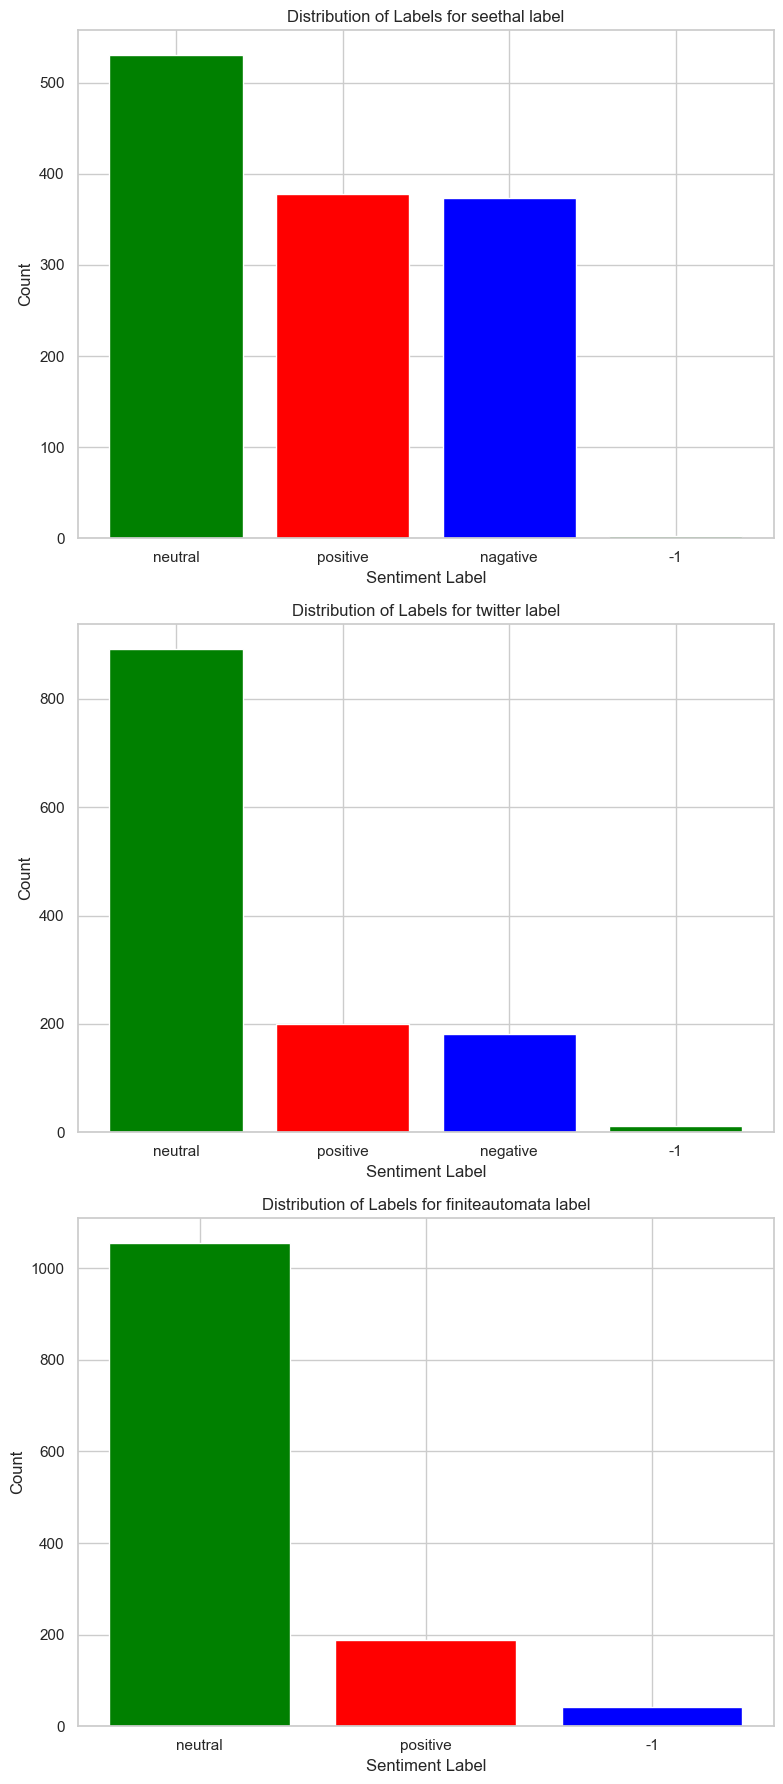

In [129]:
import matplotlib.pyplot as plt

# Columns for analysis
model_label_columns = ['seethal label', 'twitter label', 'finiteautomata label']

# Create a DataFrame to store label counts for each model label
label_counts = {}
for model_col in model_label_columns:
    counts = df[model_col].value_counts()
    label_counts[model_col] = counts

# Set up subplots
fig, axes = plt.subplots(nrows=len(model_label_columns), ncols=1, figsize=(8, 6 * len(model_label_columns)))
fig.tight_layout(pad=5.0)

# Iterate through model columns and create bar plots
for idx, model_col in enumerate(model_label_columns):
    counts = label_counts[model_col]
    labels = counts.index.astype(str)  # Convert labels to strings
    values = counts.values

    # Create a bar plot
    ax = axes[idx]
    ax.bar(labels, values, color=['green', 'red', 'blue'])
    ax.set_title(f'Distribution of Labels for {model_col}')
    ax.set_xlabel('Sentiment Label')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()